# Análisis exploratorio de los datos.

In [12]:
# Imports necesarios.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#### Verificando que tipo de datos hay en el dataset.

Número de columnas numéricas: 0
Número de columnas booleanas: 0
Número de columnas de cadena (strings): 5
Número de columnas binarias: 0


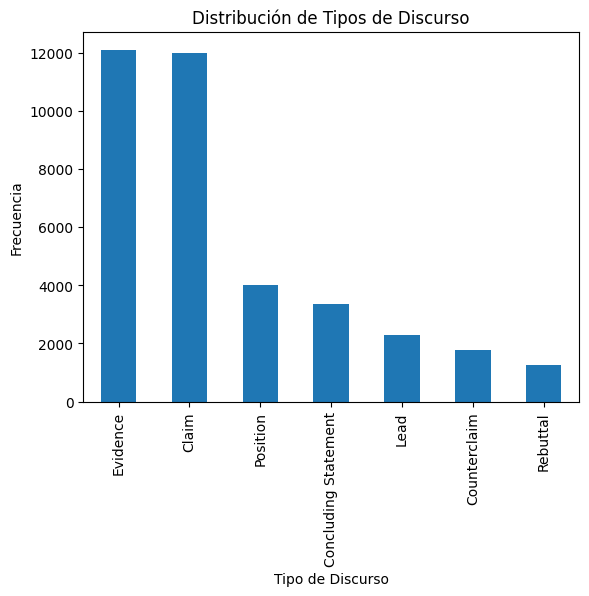

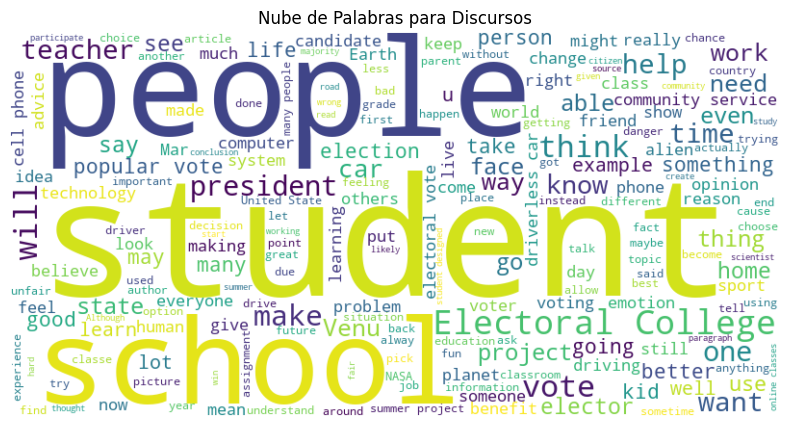

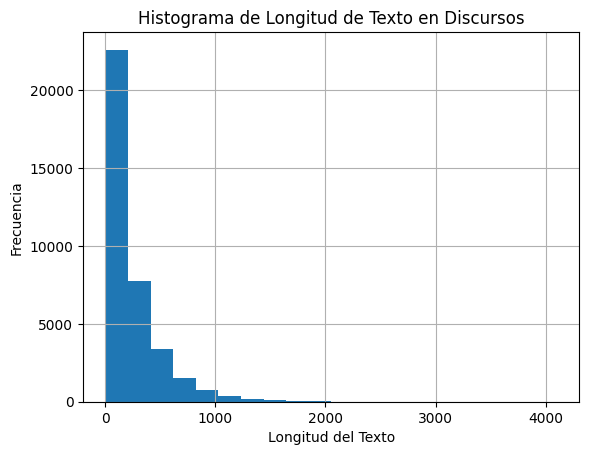

In [13]:
data = pd.read_csv('train.csv')

tipos_de_datos = data.dtypes


num_numeric = sum((tipos_de_datos == 'int64') | (tipos_de_datos == 'float64'))
num_bool = sum(tipos_de_datos == 'bool')
num_str = sum(tipos_de_datos == 'object')

# Para verificar columnas binarias
def es_binaria(columna):
    return all((columna == 0) | (columna == 1))

columnas_binarias = data.select_dtypes(include=['int64']).apply(es_binaria)
num_binary = sum(columnas_binarias)

print(f"Número de columnas numéricas: {num_numeric}")
print(f"Número de columnas booleanas: {num_bool}")
print(f"Número de columnas de cadena (strings): {num_str}")
print(f"Número de columnas binarias: {num_binary}")

# Graficando el discourse_type.
data['discourse_type'].value_counts().plot(kind='bar')
plt.xlabel('Tipo de Discurso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Discurso')
plt.show()

# Haciendo un wordcloud para los discursos.
text = ' '.join(data['discourse_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Discursos')
plt.show()

# Haciendo un histograma de discourse_text.
data['discourse_text'].str.len().hist(bins=20)
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Texto en Discursos')
plt.show()

#### Haciendo un análisis de frecuencia del discourse type.

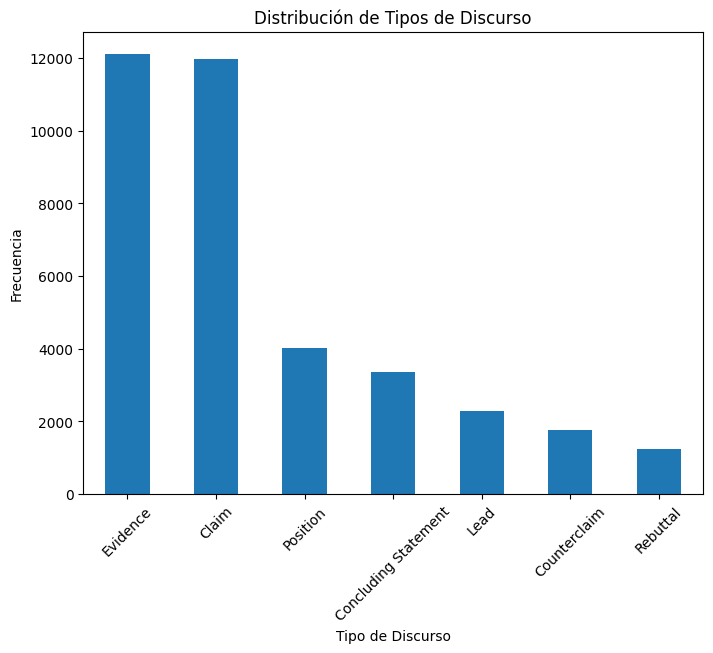

In [14]:
frequency_table = data['discourse_type'].value_counts()

frequency_table.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Tipo de Discurso')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tipos de Discurso')
plt.xticks(rotation=45)
plt.show()

#### Haciendo gráficos de proporción de las variables del dataset.

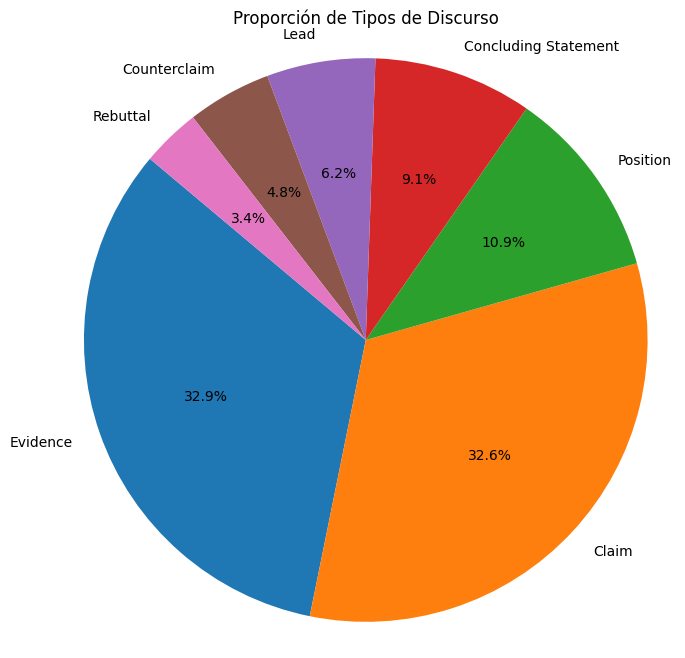

In [15]:
#discourse_type

count_by_type = data['discourse_type'].value_counts()

# Creando el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(count_by_type, labels=count_by_type.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporción de Tipos de Discurso')
plt.show()

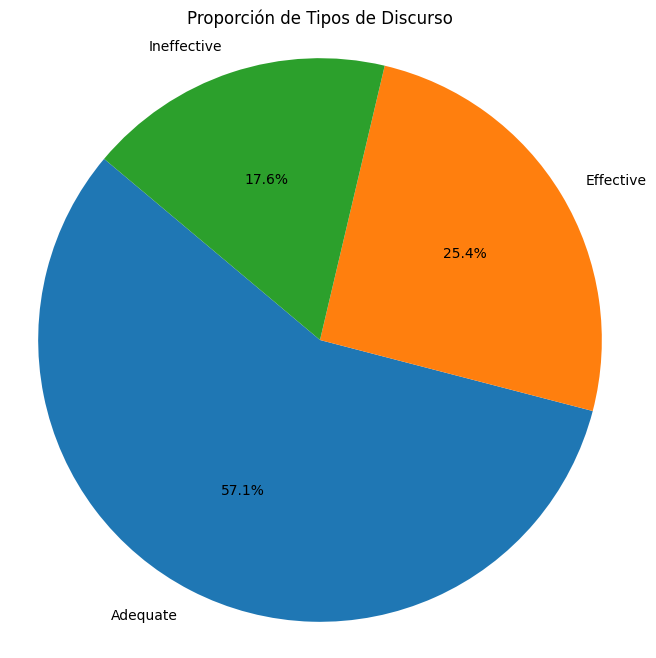

In [16]:
#discourse_effectiveness

count_by_type = data['discourse_effectiveness'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(count_by_type, labels=count_by_type.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporción de Tipos de Discurso')
plt.show()

#### Haciendo una tabla de contingencia para ver la relación entre las variables discourse_type y discourse_effectiveness

discourse_effectiveness  Adequate  Effective  Ineffective
discourse_type                                           
Claim                        7097       3405         1475
Concluding Statement         1945        825          581
Counterclaim                 1150        418          205
Evidence                     6064       2885         3156
Lead                         1244        683          364
Position                     2784        770          470
Rebuttal                      693        340          211


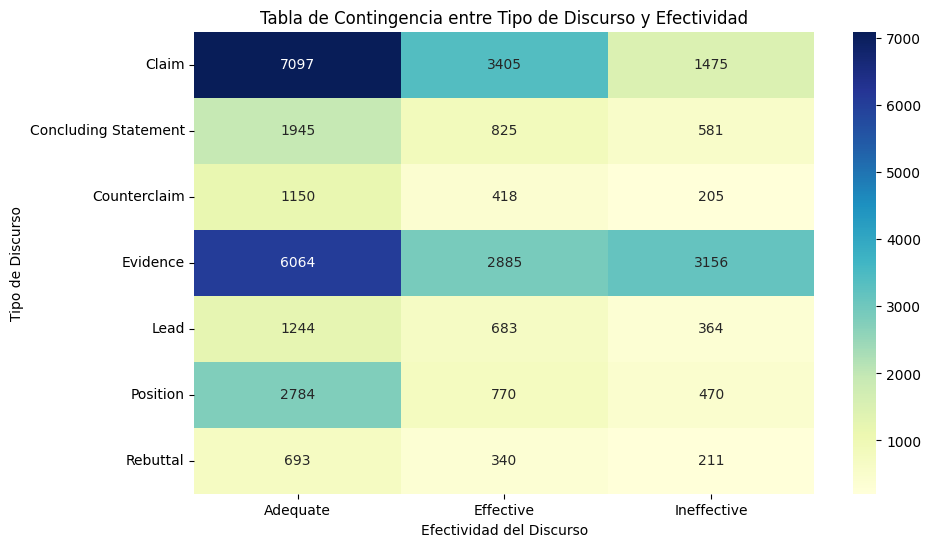

In [17]:
contingency_table = pd.crosstab(data['discourse_type'], data['discourse_effectiveness'])
print(contingency_table)

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Efectividad del Discurso')
plt.ylabel('Tipo de Discurso')
plt.title('Tabla de Contingencia entre Tipo de Discurso y Efectividad')
plt.show()

#### Haciendo un poco de estadística descriptiva en el dataset.

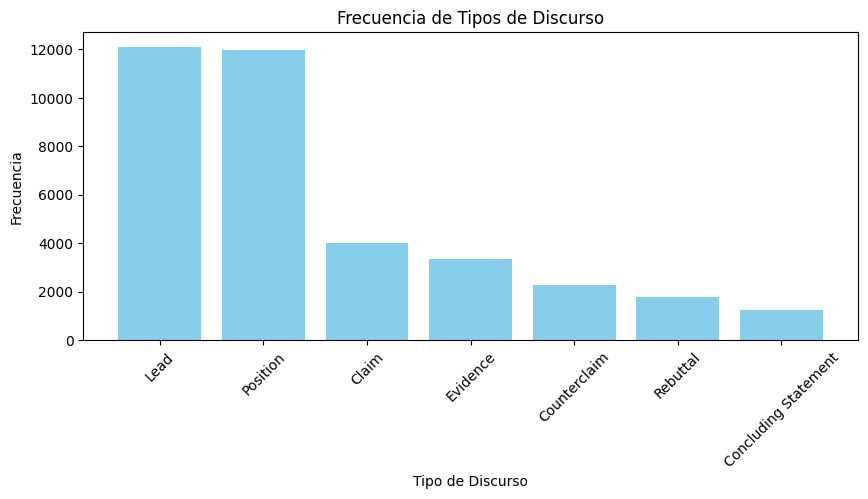

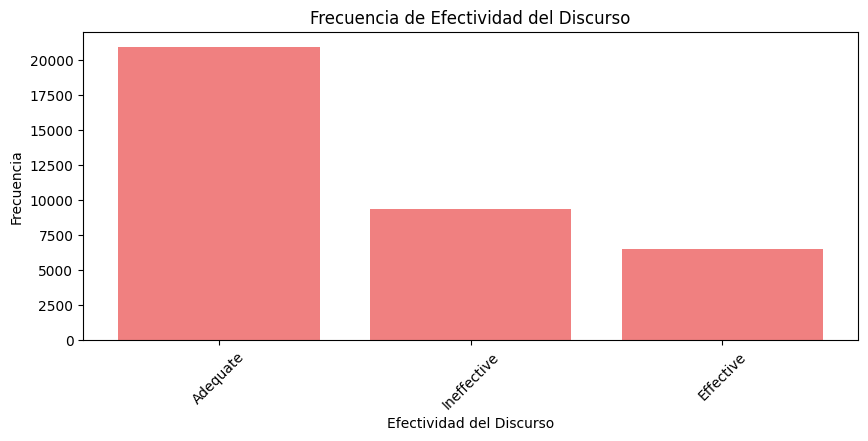

In [20]:
# Valores únicos en la columna 'discourse_type'
unique_discourse_types = data['discourse_type'].unique()

# Valores únicos en la columna 'discourse_effectiveness'
unique_discourse_effectiveness = data['discourse_effectiveness'].unique()

# Gráfico de barras para 'discourse_type'
plt.figure(figsize=(10, 4))
plt.bar(unique_discourse_types, data['discourse_type'].value_counts(), color='skyblue')
plt.xlabel('Tipo de Discurso')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipos de Discurso')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para 'discourse_effectiveness'
plt.figure(figsize=(10, 4))
plt.bar(unique_discourse_effectiveness, data['discourse_effectiveness'].value_counts(), color='lightcoral')
plt.xlabel('Efectividad del Discurso')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Efectividad del Discurso')
plt.xticks(rotation=45)
plt.show()

#### Verificando la relación que existe entre el discourse_type y el discourse_effectiveness.

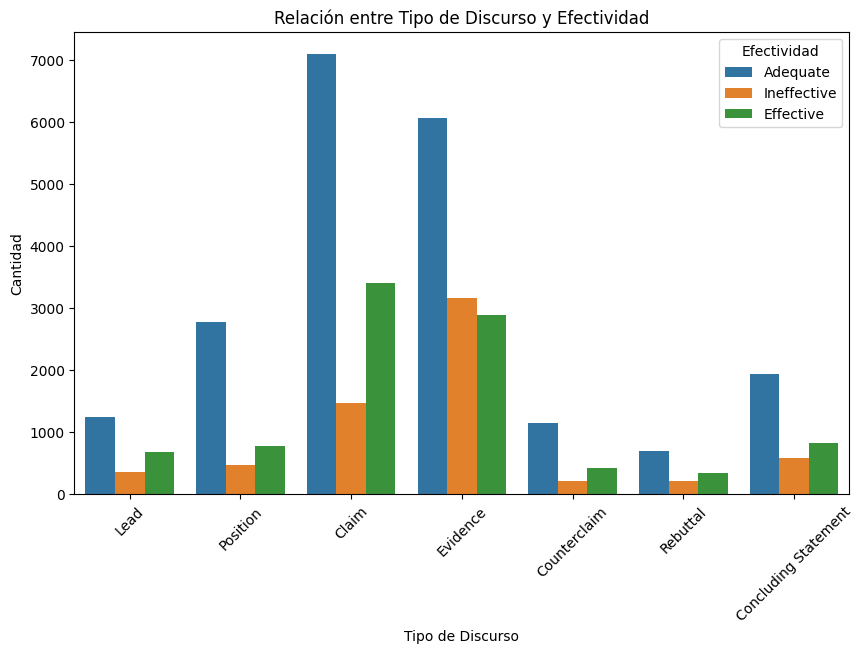

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='discourse_type', hue='discourse_effectiveness', data=data)
plt.xticks(rotation=45)
plt.xlabel('Tipo de Discurso')
plt.ylabel('Cantidad')
plt.title('Relación entre Tipo de Discurso y Efectividad')
plt.legend(title='Efectividad', loc='upper right')
plt.show()